In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('useful_boat_data.csv')

# Analyses of Categorical Data

In [ ]:
# boolean filter for top 25% of views
high_views = df['Number of views last 7 days']> df['Number of views last 7 days'].quantile(0.75)
# df[high_views].info()

## Countries

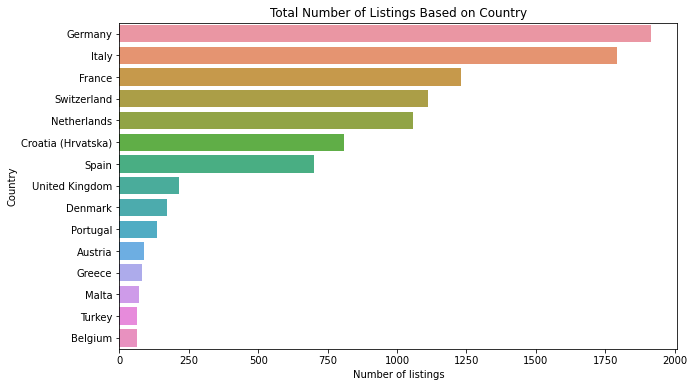

In [ ]:
# plot_data = df[high_views]['Country'].value_counts()[:10]
plot_data = df['Country'].value_counts()[:15]

fig, ax = plt.subplots(figsize = (10,6))

sns.barplot(y=plot_data.index, x = plot_data.values, ax=ax)
ax.set(xlabel = 'Number of listings', ylabel = 'Country', title = 'Total Number of Listings Based on Country')
plt.show()

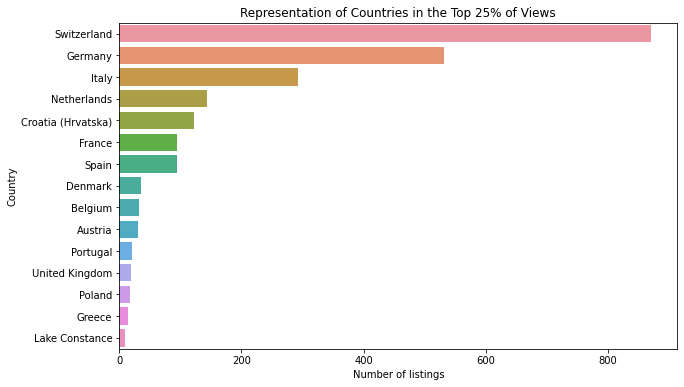

In [ ]:
plot_data = df[high_views]['Country'].value_counts()[:15]
# plot_data = df['Country'].value_counts()[:10]

fig, ax = plt.subplots(figsize = (10,6))

sns.barplot(y=plot_data.index, x = plot_data.values, ax=ax)
ax.set(xlabel = 'Number of listings', ylabel = 'Country', title = 'Representation of Countries in the Top 25% of Views')
plt.show()

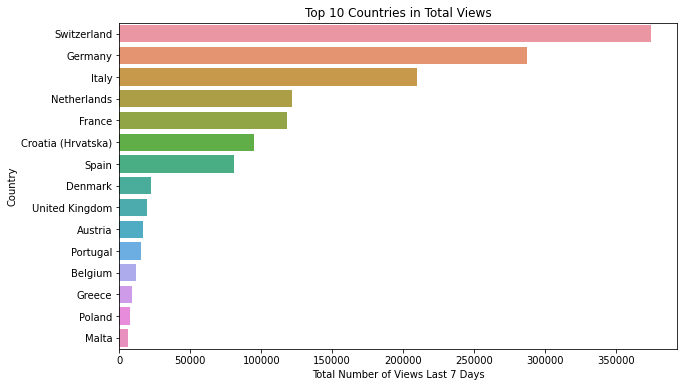

In [ ]:
top10countries_by_views = df.groupby('Country')['Number of views last 7 days'].sum().sort_values(ascending=False)[:15]
# print(top10countries_by_views)

plot_data = top10countries_by_views
fig, ax = plt.subplots(figsize = (10,6))
sns.barplot(y=plot_data.index, x = plot_data.values, ax=ax)
ax.set(xlabel = 'Total Number of Views Last 7 Days', ylabel = 'Country', title = 'Top 10 Countries in Total Views')
plt.show()

## Boat Types

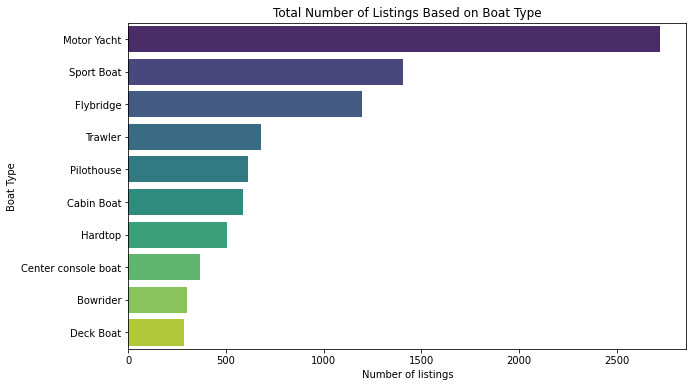

In [ ]:
# plot_data = df[high_views]['Country'].value_counts()[:10]
plot_data = df['Boat Type'].value_counts()[:10]

fig, ax = plt.subplots(figsize = (10,6))

sns.barplot(y=plot_data.index, x = plot_data.values, palette = 'viridis', ax=ax)
ax.set(xlabel = 'Number of listings', ylabel = 'Boat Type', title = 'Total Number of Listings Based on Boat Type')
plt.show()

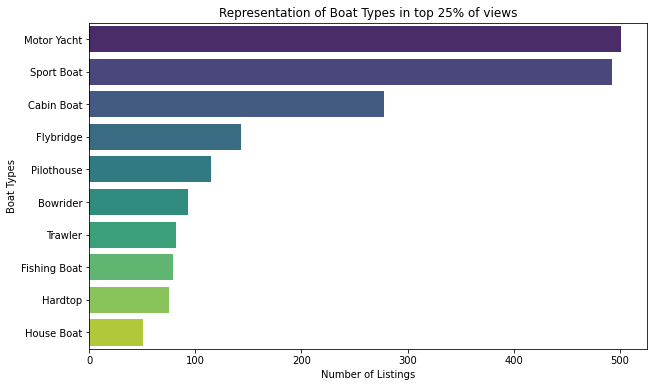

In [ ]:
plot_data = df[high_views]['Boat Type'].value_counts()[:10]

fig, ax = plt.subplots(figsize = (10,6))
sns.barplot(y=plot_data.index, x = plot_data.values, palette = 'viridis', ax=ax)
ax.set(xlabel = 'Number of Listings', ylabel = 'Boat Types', title = 'Representation of Boat Types in top 25% of views')
plt.show()

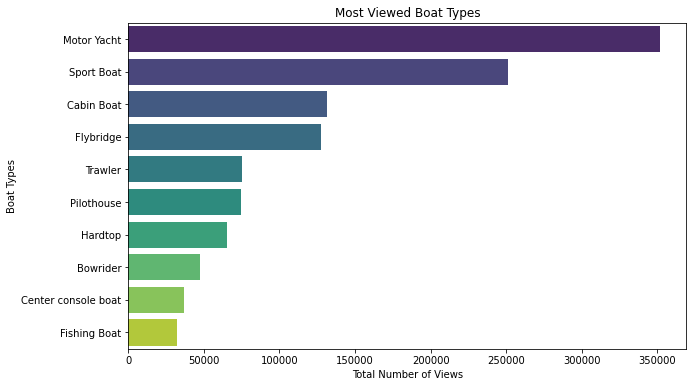

In [ ]:
plot_data = df.groupby('Boat Type')['Number of views last 7 days'].sum().sort_values(ascending=False)[:10]

fig, ax = plt.subplots(figsize = (10,6))
sns.barplot(y=plot_data.index, x = plot_data.values, palette = 'viridis', ax=ax)
ax.set(xlabel = 'Total Number of Views', ylabel = 'Boat Types', title = 'Most Viewed Boat Types')
plt.show()

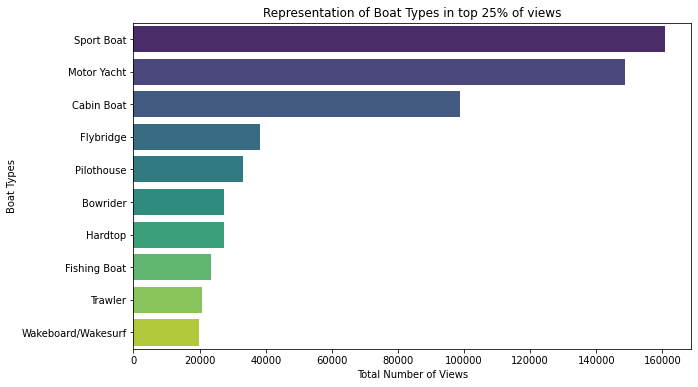

In [ ]:
plot_data = df[high_views].groupby('Boat Type')['Number of views last 7 days'].sum().sort_values(ascending=False)[:10]

fig, ax = plt.subplots(figsize = (10,6))
sns.barplot(y=plot_data.index, x = plot_data.values, palette = 'viridis', ax=ax)
ax.set(xlabel = 'Total Number of Views', ylabel = 'Boat Types', title = 'Representation of Boat Types in top 25% of views')
plt.show()

## Manufacturer

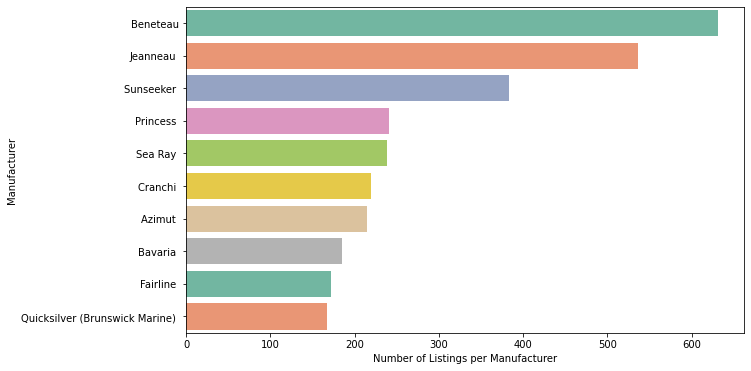

In [ ]:
plot_data = df.groupby('Manufacturer')['Number of views last 7 days'].count().sort_values(ascending=False)[:10]

fig, ax = plt.subplots(figsize = (10,6))
sns.barplot(y=plot_data.index, x = plot_data.values, palette = 'Set2', ax=ax)
ax.set(xlabel = 'Number of Listings per Manufacturer', ylabel = 'Manufacturer')
plt.show()

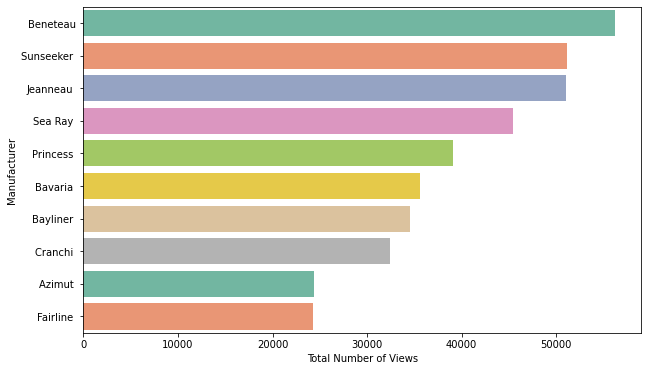

In [ ]:
plot_data = df.groupby('Manufacturer')['Number of views last 7 days'].sum().sort_values(ascending=False)

n = 10  # only do top 10
fig, ax = plt.subplots(figsize = (10,6))
sns.barplot(y=plot_data.index[:n], x = plot_data.values[:n], palette = 'Set2', ax=ax)
ax.set(xlabel = 'Total Number of Views', ylabel = 'Manufacturer')
plt.show()

In [ ]:
plot_data = df.groupby('Manufacturer')['Number of views last 7 days'].count().sort_values(ascending=False)
fraction_listings_manufacturer = plot_data/np.sum(plot_data)
# print(np.sum(plot_data.values))
print(plot_data.head(10))
print(fraction_listings_manufacturer.head(10))

Manufacturer
Beneteau                           631
Jeanneau                           537
Sunseeker                          383
Princess                           241
Sea Ray                            239
Cranchi                            219
Azimut                             215
Bavaria                            185
Fairline                           172
Quicksilver (Brunswick Marine)     167
Name: Number of views last 7 days, dtype: int64
Manufacturer
Beneteau                           0.073801
Jeanneau                           0.062807
Sunseeker                          0.044795
Princess                           0.028187
Sea Ray                            0.027953
Cranchi                            0.025614
Azimut                             0.025146
Bavaria                            0.021637
Fairline                           0.020117
Quicksilver (Brunswick Marine)     0.019532
Name: Number of views last 7 days, dtype: float64


## Price affect

In [ ]:
## In the end I prefer dividing into tenths rather than quarters

# price_bins = [price.quantile(i) for i in np.linspace(0,1,5)]   # define the bins in quarters

# bin_labels = ['0-25', '25-50', '50-75', '75-100']
# price_percentiles=  pd.cut(price, bins = price_bins, labels = bin_labels)
# print(price_percentiles.value_counts())

# df['price_percentile'] = price_percentiles  # create new column for cutting price data

In [ ]:
# plot_data = df.groupby('price_percentile')['Number of views last 7 days'].sum().sort_values(ascending=False)[:10]

# fig, ax = plt.subplots(figsize = (10,6))
# sns.barplot(y=plot_data.index, x = plot_data.values, palette = 'flare_r', ax=ax)
# ax.set(xlabel = 'Total Number of Views', ylabel = 'Percentile of Prices', title = 'How Does Price Affect Views')
# plt.show()

In [ ]:
price = df['Price_Euros']
print(np.linspace(0,1,11))
print(price.quantile(0))

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
3224.0


In [ ]:
## Creating 'price_percentile' column
price = df['Price_Euros']
price_bins = [price.quantile(i) for i in np.linspace(0,1,11)]   # define the bins in tenths
print('bins = ',price_bins)

bin_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
price_percentiles=  pd.cut(price, bins = price_bins, labels = bin_labels)
# print(price_percentiles.value_counts())

df['price_percentile'] = price_percentiles  # create new column for cutting price data

bins =  [3224.0, 21078.9, 35147.0, 49900.0, 68900.0, 92105.0, 135000.0, 199000.0, 299000.0, 580000.0, 31000000.0]


In [ ]:
price_percentiles.head()

0      0-10
1     11-20
2     51-60
3    91-100
4      0-10
Name: Price_Euros, dtype: category
Categories (10, object): ['0-10' < '11-20' < '21-30' < '31-40' ... '61-70' < '71-80' < '81-90' < '91-100']

In [ ]:
d = {'percentile_groups': bin_labels, 'percentile cutoff': price_bins[1:]}
df_percentile = pd.DataFrame(data=d)
df_percentile

,percentile_groups,percentile cutoff
0,0-10,21078.9
1,11-20,35147.0
2,21-30,49900.0
3,31-40,68900.0
4,41-50,92105.0
5,51-60,135000.0
6,61-70,199000.0
7,71-80,299000.0
8,81-90,580000.0
9,91-100,31000000.0


In [ ]:
def percentile_create(col_data, col_name):
    
    bin_values = [col_data.quantile(i) for i in np.linspace(0,1,11)]
    bin_values[0] = bin_values[0]-1  # make sure the first bin value is inclusive
    print('bins = ', bin_values)
    bin_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
    
    cut_series = pd.cut(col_data, bins = bin_values, labels = bin_labels)   # creates a Series of bin_labels that corresponds to col_data
    
    df_cut = pd.DataFrame(data={col_name: col_data, 'Percentile': cut_series})
    count_values = df_cut.value_counts('Percentile', sort=False).values
    
    
    df_percentile_values = pd.DataFrame(data={'Percentile Group': bin_labels, 'Min': bin_values[:-1], 'Max': bin_values[1:], 'Counts': count_values})
    
    return df_cut, df_percentile_values

bins =  [3223.0, 21078.9, 35147.0, 49900.0, 68900.0, 92105.0, 135000.0, 199000.0, 299000.0, 580000.0, 31000000.0]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Price_Euros                  9888 non-null   float64 
 1   Percentile                   9888 non-null   category
 2   Number of views last 7 days  9888 non-null   int64   
dtypes: category(1), float64(1), int64(1)
memory usage: 164.7 KB
None
  Percentile Group       Min         Max  Counts
0             0-10    3223.0     21078.9     989
1            11-20   21078.9     35147.0     989
2            21-30   35147.0     49900.0    1008
3            31-40   49900.0     68900.0     973
4            41-50   68900.0     92105.0     985
5            51-60   92105.0    135000.0    1020
6            61-70  135000.0    199000.0    1001
7            71-80  199

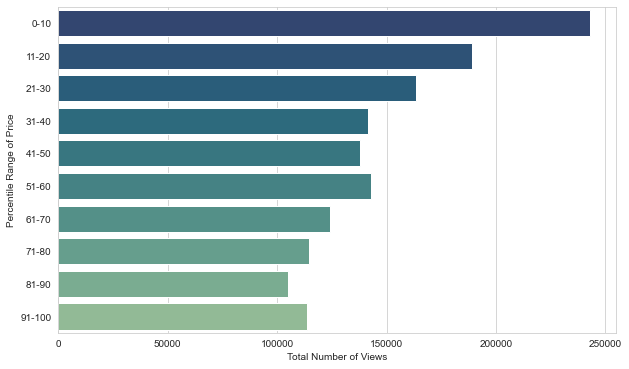

In [ ]:
col_name = 'Price_Euros'
# col_name = 'Length'
# col_name = 'Year Built'
df_cut, df_percentile_values = percentile_create(df[col_name], col_name)

df_cut['Number of views last 7 days'] = df['Number of views last 7 days']
print(df_cut.info())

print(df_percentile_values)


## -- Plotting aggregrate statistics --##
plot_data = df_cut.groupby('Percentile')['Number of views last 7 days'].agg([np.mean, np.sum])
print(plot_data)

sns.set_style("whitegrid")
color_pal = 'crest_r' # for Price data
# color_pal = 'icefire_r'  # for Length data
fig, ax = plt.subplots(figsize = (10,6))

snsplot = sns.barplot(data = plot_data, y=plot_data.index, x = 'sum', palette=color_pal, ax = ax)

ax.set(xlabel = 'Total Number of Views', ylabel = 'Percentile Range of Price')
plt.show()

In [ ]:
df_percentile_values

,Percentile Group,Min,Max,Counts
0,0-10,3223.0,21078.9,989
1,11-20,21078.9,35147.0,989
2,21-30,35147.0,49900.0,1008
3,31-40,49900.0,68900.0,973
4,41-50,68900.0,92105.0,985
5,51-60,92105.0,135000.0,1020
6,61-70,135000.0,199000.0,1001
7,71-80,199000.0,299000.0,957
8,81-90,299000.0,580000.0,980
9,91-100,580000.0,31000000.0,986


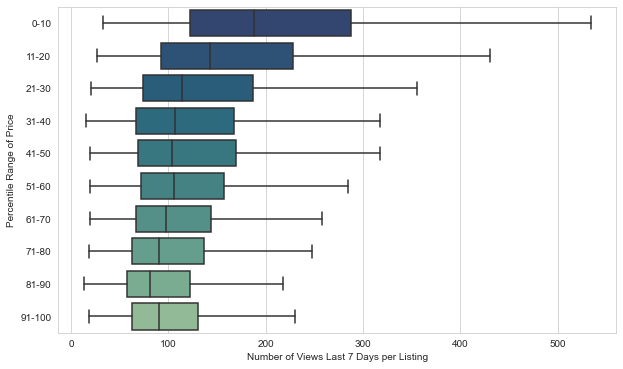

In [ ]:
## -- Box plot of the same data --##
fig, ax = plt.subplots(figsize = (10,6))

plot_data = df_cut
sns.boxplot(data = plot_data, y='Percentile', x= 'Number of views last 7 days', palette = color_pal, showfliers=False, ax=ax)
ax.set(xlabel = 'Number of Views Last 7 Days per Listing', ylabel = 'Percentile Range of Price')
plt.show()

                        mean     sum
price_percentile                    
0-10              245.633603  242686
11-20             191.253792  189150
21-30             162.227183  163525
31-40             145.505653  141577
41-50             139.751269  137655
51-60             139.943137  142742
61-70             124.150849  124275
71-80             119.845350  114692
81-90             107.131633  104989
91-100            115.088235  113477


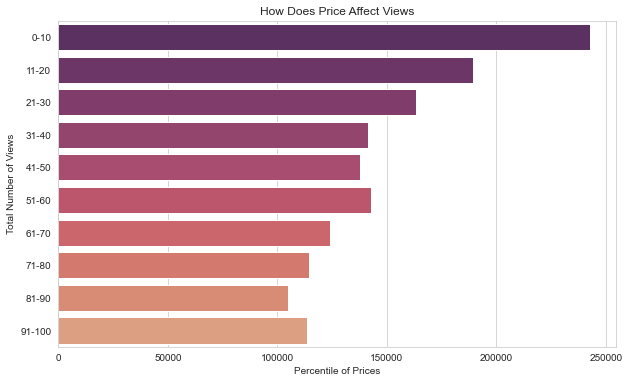

In [ ]:
plot_data = df.groupby('price_percentile')['Number of views last 7 days'].agg([np.mean, np.sum])
print(plot_data)

fig, ax = plt.subplots(figsize = (10,6))

sns.barplot(data = plot_data, y=plot_data.index, x = 'sum', palette = 'flare_r', ax=ax)
ax.set(ylabel = 'Total Number of Views', xlabel = 'Percentile of Prices', title = 'How Does Price Affect Views')
plt.show()

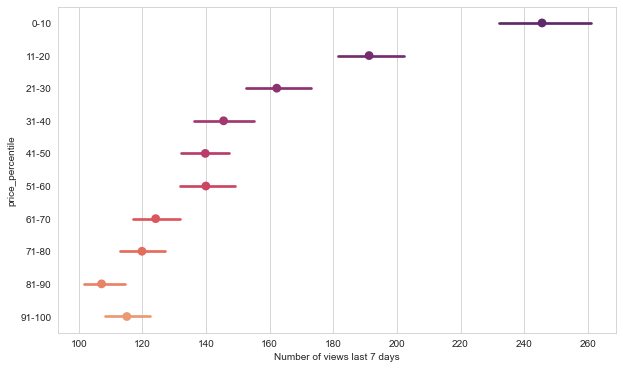

In [ ]:
plot_data = df.loc[:, ['Number of views last 7 days', 'price_percentile']]

fig, ax = plt.subplots(figsize = (10,6))

sns.pointplot(data = plot_data, y='price_percentile', x= 'Number of views last 7 days', palette = 'flare_r', join=True, ax=ax)
# ax.set(xlabel = 'Average Number of Views', ylabel = 'Percentile of Prices', title = 'How Does Price Affect Views')
plt.show()

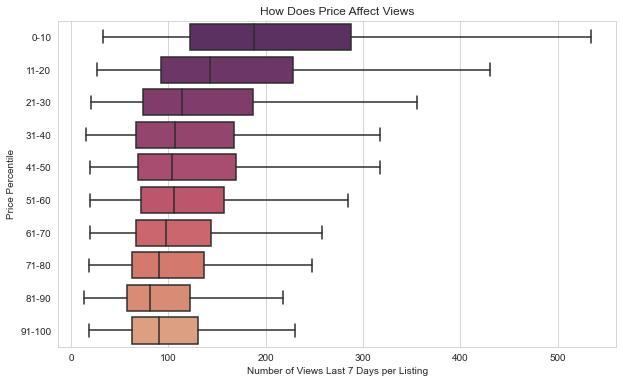

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))

plot_data = df.loc[:, ['Number of views last 7 days', 'price_percentile']]
sns.boxplot(data = plot_data, y='price_percentile', x= 'Number of views last 7 days', palette = 'flare_r', showfliers=False, ax=ax)
ax.set(xlabel = 'Number of Views Last 7 Days per Listing', ylabel = 'Price Percentile', title = 'How Does Price Affect Views')
plt.show()

To get the double bar plot of mean and sum, stack the two columns vertically and have another column that identifies the aggregate type.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Unnamed: 0                   9888 non-null   int64   
 1   Unnamed: 0.1                 9888 non-null   int64   
 2   Unnamed: 0.1.1               9888 non-null   int64   
 3   Number of views last 7 days  9888 non-null   int64   
 4   currency                     9888 non-null   object  
 5   Price_Euros                  9888 non-null   float64 
 6   Boat Type                    9888 non-null   object  
 7   Manufacturer                 8550 non-null   object  
 8   Type                         9882 non-null   object  
 9   Condition                    9882 non-null   object  
 10  Year Built                   9337 non-null   float64 
 11  Length                       9879 non-null   float64 
 12  Width                        9832 non-null   float64 
 13  Mat

## Correlation

In [ ]:
df_numerical = df[['Price_Euros', 'Year Built', 'Length', 'Width']]

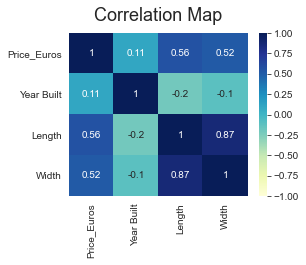

In [ ]:
plt.figure(figsize=(4, 3))
heatmap = sns.heatmap(df_numerical.corr(method='pearson'), vmin=-1, vmax=1, cmap="YlGnBu", annot=True)
heatmap.set_title('Correlation Map', fontdict={'fontsize':18}, pad=12);

In [ ]:
df_numerical.corr(method='pearson')

,Price_Euros,Year Built,Length,Width
Price_Euros,1.000000,0.105200,0.562845,0.518888
Year Built,0.105200,1.000000,-0.202201,-0.104668
Length,0.562845,-0.202201,1.000000,0.873093
Width,0.518888,-0.104668,0.873093,1.000000


In [ ]:
year_data = df['Year Built']
year_data_format = pd.to_datetime(year_data, format = '%Y')

In [ ]:
year_data.describe()

count    9337.000000
mean     2004.914962
std        16.356241
min      1885.000000
25%      1999.000000
50%      2008.000000
75%      2018.000000
max      2021.000000
Name: Year Built, dtype: float64

In [ ]:
year_data_format.describe()

count                    9337
unique                    121
top       2020-01-01 00:00:00
freq                     1279
first     1885-01-01 00:00:00
last      2021-01-01 00:00:00
Name: Year Built, dtype: object

In [ ]:
df['Year Built'] = year_data_format

In [ ]:
df.head(10)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Number of views last 7 days,currency,Price_Euros,Boat Type,Manufacturer,Type,Condition,Year Built,Length,Width,Material,Country,price_percentile
0,0,0,0,3263,CHF,14751.00,Motor Yacht,Bayliner,"Used boat,Unleaded",Used,1992-01-01,7.70,2.46,Plastic,Switzerland,0-10
1,1,1,1,2432,CHF,34650.00,Hardtop,Princess,"Used boat,Diesel",Used,1979-01-01,11.12,3.88,GRP,Switzerland,11-20
2,2,2,2,2261,CHF,124641.00,"Bowrider,Motor Yacht,Sport Boat",Windy,"Used boat,Diesel",Used,2002-01-01,12.35,3.48,GRP,Switzerland,51-60
3,3,3,3,2154,EUR,949000.00,Hardtop,Pershing,"Used boat,Diesel",Used,2009-01-01,20.30,5.20,GRP,Neustadt in Holstein (Ostsee),91-100
4,4,4,4,2026,CHF,19701.00,Sport Boat,Sea Ray,"Used boat,Unleaded",Used,1993-01-01,6.14,2.34,Plastic,Switzerland,0-10
5,5,5,5,1970,CHF,48015.00,Cabin Boat,Viper,"Used boat,Unleaded",Used,2014-01-01,6.65,2.30,GRP,Switzerland,21-30
6,6,6,6,1917,CHF,4949.01,"Sport Boat,Wakeboard/Wakesurf,Water ski",Tullio Abbate,"Used boat,Unleaded",Used,1980-01-01,6.00,2.10,GRP,Switzerland,0-10
7,7,7,7,1834,CHF,35640.00,Sport Boat,Correct Craft,"Used boat,Unleaded",Used,2005-01-01,6.40,2.31,GRP,Switzerland,21-30
8,8,8,8,1831,CHF,6435.00,Sport Boat,Baha,"Used boat,Unleaded",Used,1995-01-01,6.80,2.38,GRP,Thun,0-10
9,9,9,9,1804,CHF,3762.00,Cabin Boat,Draco,"Used boat,Unleaded",Used,1980-01-01,6.20,2.45,GRP,Switzerland,0-10


In [ ]:
plot_data = df.groupby('Year Built')['Number of views last 7 days'].agg([np.sum, np.mean])

In [ ]:
plot_data.head()

,sum,mean
Year Built,,
1885-01-01,160,160.0
1889-01-01,83,83.0
1895-01-01,33,33.0
1897-01-01,119,119.0
1898-01-01,25,25.0


<AxesSubplot:xlabel='Year Built', ylabel='mean'>

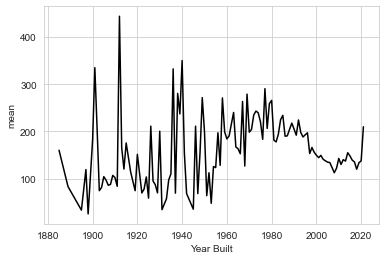

In [ ]:
sns.lineplot(x=plot_data.index, y =plot_data['mean'], color = 'k')